#Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import yfinance as yf

#Arquivo

In [2]:
df = sns.load_dataset('fmri')
df

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970
...,...,...,...,...,...
1059,s0,8,cue,frontal,0.018165
1060,s13,7,cue,frontal,-0.029130
1061,s12,7,cue,frontal,-0.004939
1062,s11,7,cue,frontal,-0.025367


#Testando

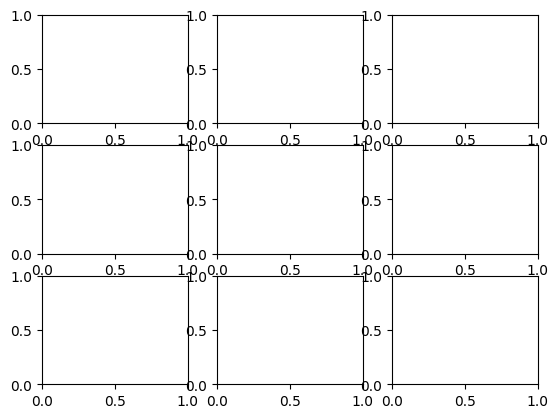

In [3]:
fig, ax = plt.subplots(3, 3)

In [4]:
subjects = ['s0', 's1', 's2', 's3', 's4', 's5', 's6', 's7', 's8']
lista_subjects = []
print(" = = = INÍCIO = = =")
for sbj in subjects:
  subject_s = df[df['subject'] == sbj].sort_values(by='timepoint')
  lista_subjects.append(subject_s)
print(lista_subjects)

 = = = INÍCIO = = =
[     subject  timepoint event    region    signal
521       s0          0  stim  parietal -0.039327
932       s0          0   cue   frontal  0.007766
67        s0          0  stim   frontal -0.021452
1063      s0          0   cue  parietal -0.006899
624       s0          1   cue   frontal  0.016440
...      ...        ...   ...       ...       ...
498       s0         17  stim   frontal -0.039322
812       s0         18   cue  parietal -0.014664
721       s0         18   cue   frontal -0.003497
515       s0         18  stim   frontal -0.048430
14        s0         18  stim  parietal -0.075570

[76 rows x 5 columns],     subject  timepoint event    region    signal
84       s1          0  stim  parietal -0.064454
706      s1          0   cue  parietal -0.057706
707      s1          0   cue   frontal -0.040937
284      s1          0  stim   frontal -0.046049
281      s1          1  stim   frontal -0.060273
..      ...        ...   ...       ...       ...
825      s1 

In [5]:
s0 = lista_subjects[0]
s0

,subject,timepoint,event,region,signal
521,s0,0,stim,parietal,-0.039327
932,s0,0,cue,frontal,0.007766
67,s0,0,stim,frontal,-0.021452
1063,s0,0,cue,parietal,-0.006899
624,s0,1,cue,frontal,0.016440
...,...,...,...,...,...
498,s0,17,stim,frontal,-0.039322
812,s0,18,cue,parietal,-0.014664
721,s0,18,cue,frontal,-0.003497
515,s0,18,stim,frontal,-0.048430


#Exercicios

##Exercicio 1

In [6]:
df

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970
...,...,...,...,...,...
1059,s0,8,cue,frontal,0.018165
1060,s13,7,cue,frontal,-0.029130
1061,s12,7,cue,frontal,-0.004939
1062,s11,7,cue,frontal,-0.025367


###O reshape lineariza o vetor criado na primeira linha

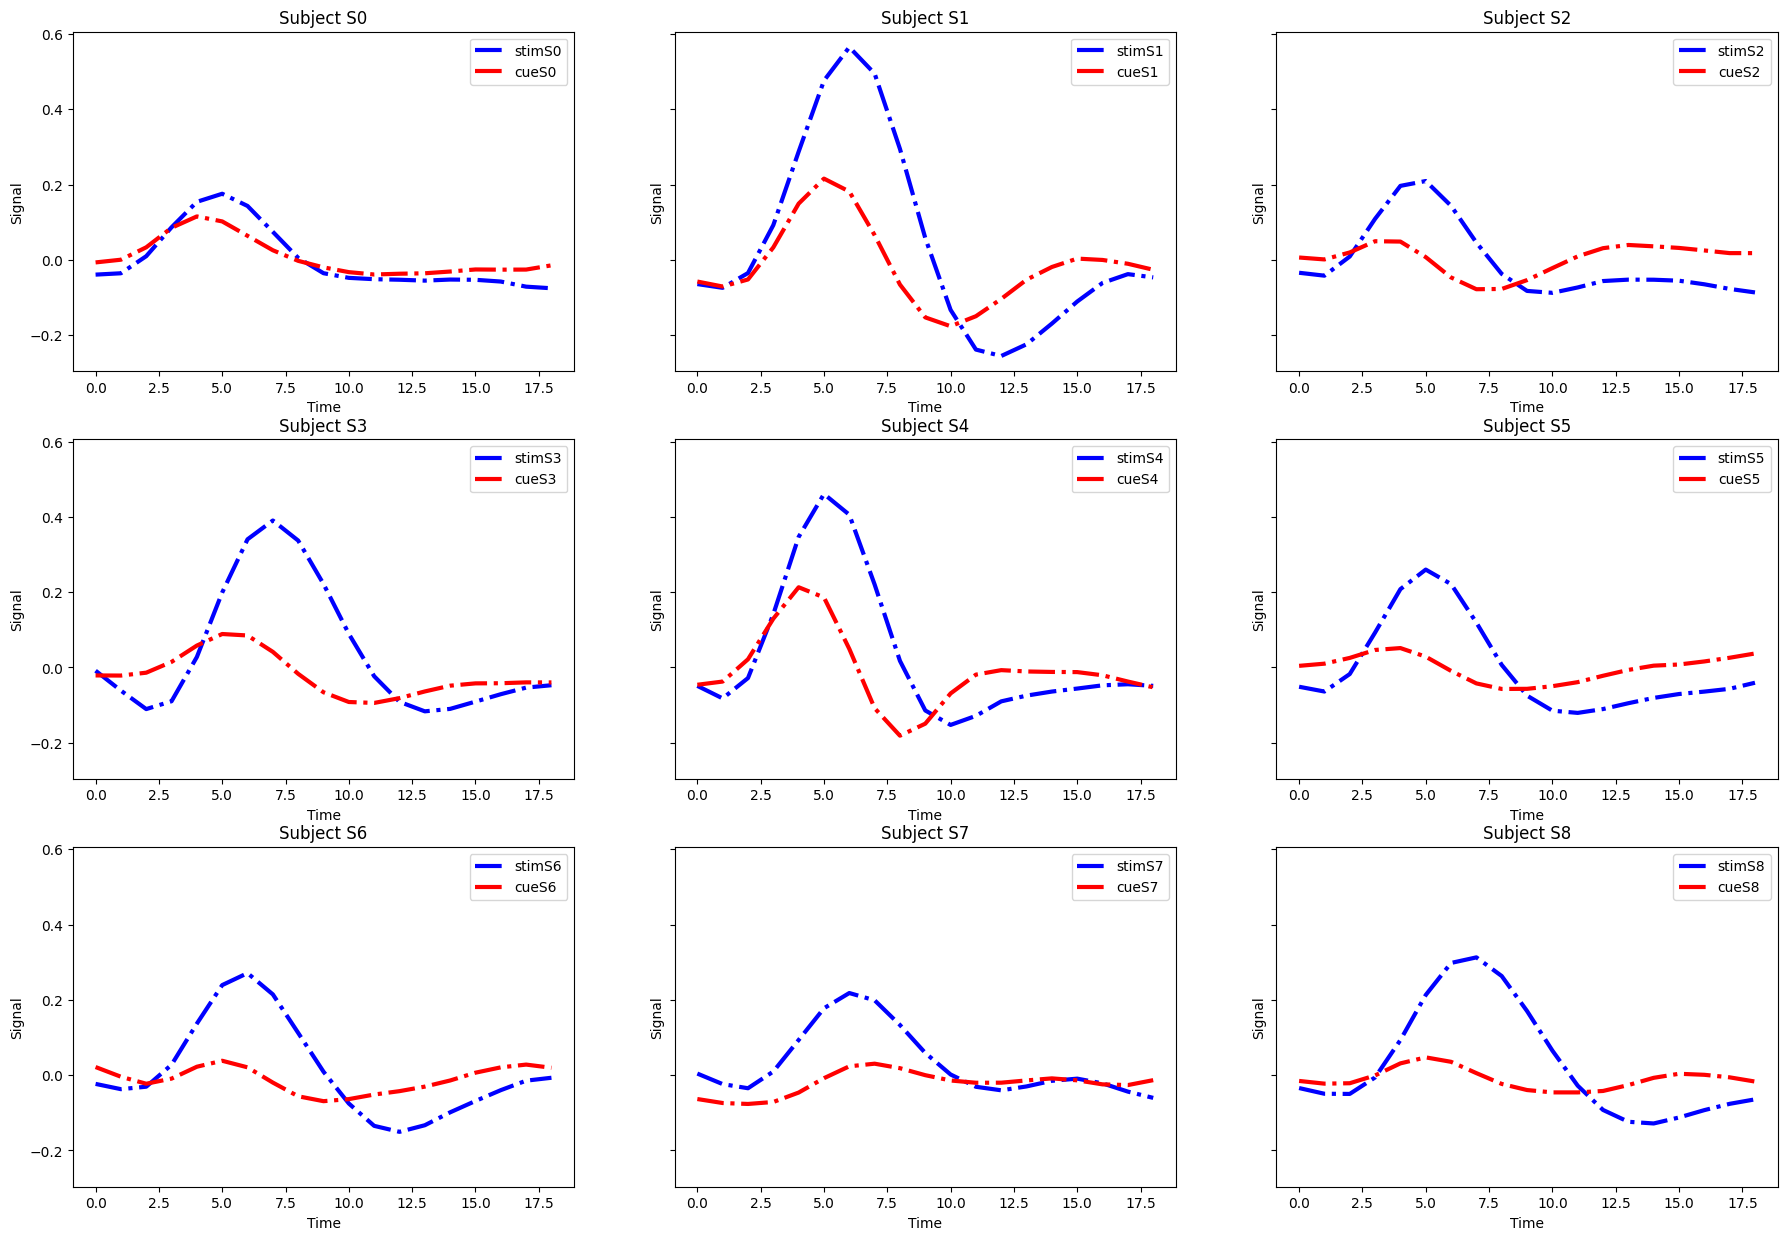

In [7]:
fig, ax = plt.subplots(3, 3, figsize=(22, 15), sharey=True)

ax = ax.reshape(-1)

for i in range(0, 9):
  ax[i].plot(df[(df['subject'] == f's{i}') & (df['region'] == 'parietal') & (df['event'] == 'stim')].sort_values(by='timepoint').timepoint,
            df[(df['subject'] == f's{i}') & (df['region'] == 'parietal') & (df['event'] == 'stim')].sort_values(by='timepoint').signal,
            color='blue', linestyle='dashdot', linewidth=3, markersize=1)
  ax[i].plot(df[(df['subject'] == f's{i}') & (df['region'] == 'parietal') & (df['event'] == 'cue')].sort_values(by='timepoint').timepoint,
            df[(df['subject'] == f's{i}') & (df['region'] == 'parietal') & (df['event'] == 'cue')].sort_values(by='timepoint').signal,
            color='red', linestyle='dashdot', linewidth=3, markersize=1)
  ax[i].set_title(f'Subject S{i}')
  ax[i].legend([f'stimS{i}', f'cueS{i}'])
  ax[i].set_xlabel('Time')
  ax[i].set_ylabel('Signal')

plt.show()

###Resposta:

In [8]:
print("Sim, em todos os casos existe uma resposta cerebral mais intensa (uma amplitude maior do sinal) para os eventos de estímulo")

Sim, em todos os casos existe uma resposta cerebral mais intensa (uma amplitude maior do sinal) para os eventos de estímulo


##Exercicio 2

###Solução errada

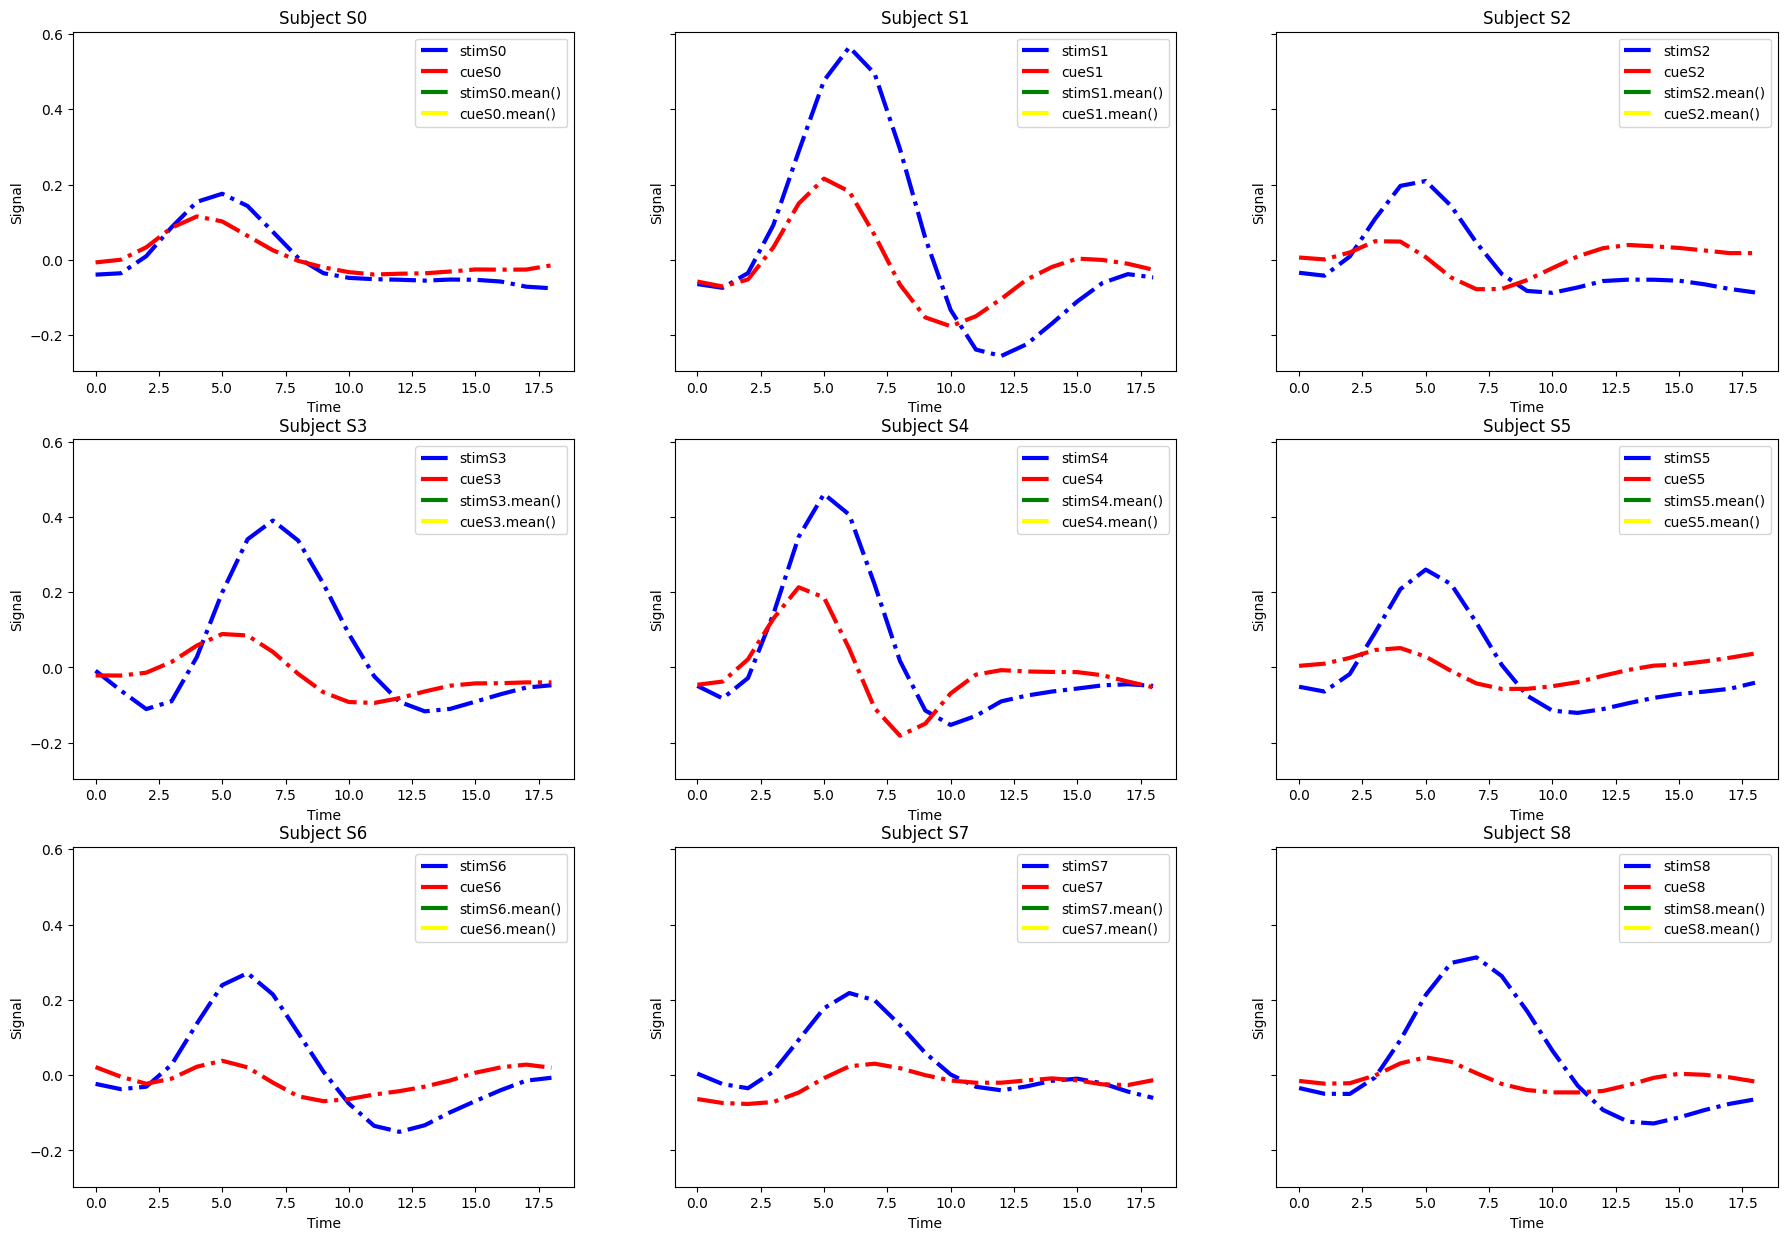

In [9]:
fig, ax = plt.subplots(3, 3, figsize=(22, 15), sharey=True)

ax = ax.reshape(-1)

for i in range(0, 9):
  ax[i].plot(df[(df['subject'] == f's{i}') & (df['region'] == 'parietal') & (df['event'] == 'stim')].sort_values(by='timepoint').timepoint,
            df[(df['subject'] == f's{i}') & (df['region'] == 'parietal') & (df['event'] == 'stim')].sort_values(by='timepoint').signal,
            color='blue', linestyle='dashdot', linewidth=3, markersize=1)
  ax[i].plot(df[(df['subject'] == f's{i}') & (df['region'] == 'parietal') & (df['event'] == 'cue')].sort_values(by='timepoint').timepoint,
            df[(df['subject'] == f's{i}') & (df['region'] == 'parietal') & (df['event'] == 'cue')].sort_values(by='timepoint').signal,
            color='red', linestyle='dashdot', linewidth=3, markersize=1)
  ax[i].plot(df[(df['subject'] == f's{i}') & (df['region'] == 'parietal') & (df['event'] == 'stim')].sort_values(by='timepoint').timepoint.mean(),
            df[(df['subject'] == f's{i}') & (df['region'] == 'parietal') & (df['event'] == 'stim')].sort_values(by='timepoint').signal.mean(),
            color='green', linestyle='dashdot', linewidth=3, markersize=1)
  ax[i].plot(df[(df['subject'] == f's{i}') & (df['region'] == 'parietal') & (df['event'] == 'cue')].sort_values(by='timepoint').timepoint.mean(),
            df[(df['subject'] == f's{i}') & (df['region'] == 'parietal') & (df['event'] == 'cue')].sort_values(by='timepoint').signal.mean(),
            color='yellow', linestyle='dashdot', linewidth=3, markersize=1)
  ax[i].set_title(f'Subject S{i}')
  ax[i].legend([f'stimS{i}', f'cueS{i}', f'stimS{i}.mean()', f'cueS{i}.mean()'])
  ax[i].set_xlabel('Time')
  ax[i].set_ylabel('Signal')

plt.show()

###Solução certa

####Trecho que reseta o indice (pode ser ignorado)

In [10]:
df_mean = df.groupby(['event', 'timepoint', 'region']).head()
df_mean_sorted = df_mean.sort_values(by='timepoint')
fd = df_mean_sorted
fd

,subject,timepoint,event,region,signal
252,s13,0,stim,parietal,-0.042467
269,s3,0,stim,frontal,0.011056
270,s4,0,stim,frontal,-0.017516
271,s5,0,stim,frontal,-0.022977
272,s6,0,stim,frontal,-0.007947
...,...,...,...,...,...
800,s12,18,cue,parietal,-0.011434
801,s11,18,cue,parietal,0.043195
802,s10,18,cue,parietal,-0.043577
708,s13,18,cue,frontal,-0.012163


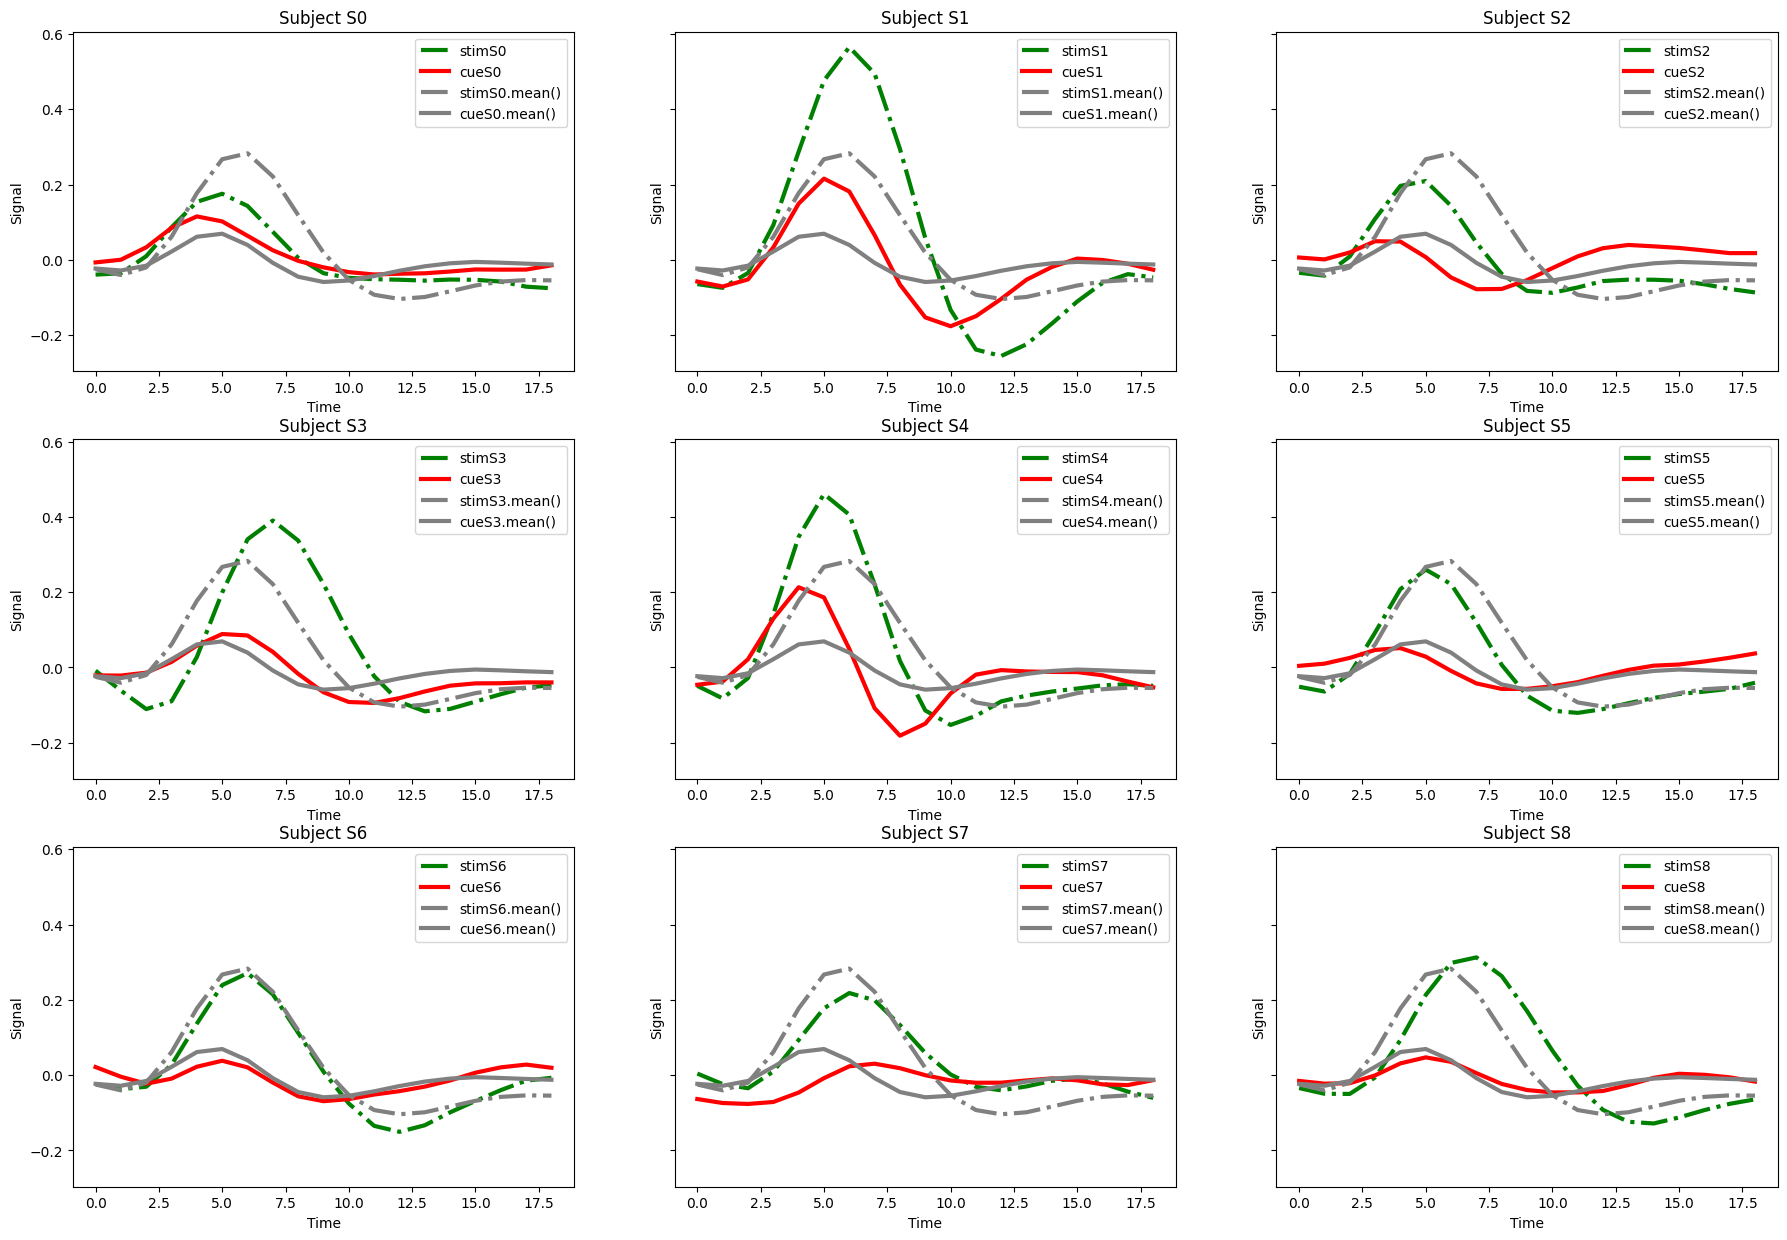

In [11]:
fig, ax = plt.subplots(3, 3, figsize=(22, 15), sharey= True)

ax = ax.reshape(-1)

for i in range(0, 9):
  ax[i].plot(df[(df['subject'] == f's{i}') & (df['region'] == 'parietal') & (df['event'] == 'stim')].sort_values(by='timepoint').timepoint,
            df[(df['subject'] == f's{i}') & (df['region'] == 'parietal') & (df['event'] == 'stim')].sort_values(by='timepoint').signal,
            color='green', linestyle='dashdot', linewidth=3, markersize=1)
  ax[i].plot(df[(df['subject'] == f's{i}') & (df['region'] == 'parietal') & (df['event'] == 'cue')].sort_values(by='timepoint').timepoint,
            df[(df['subject'] == f's{i}') & (df['region'] == 'parietal') & (df['event'] == 'cue')].sort_values(by='timepoint').signal,
            color='red', linestyle='solid', linewidth=3, markersize=1)
  ax[i].plot(df[(df['subject'] == f's{i}') & (df['region'] == 'parietal') & (df['event'] == 'stim')].sort_values(by='timepoint').timepoint,
             df[(df['region'] == 'parietal') & (df['event'] == 'stim')].groupby(['event', 'timepoint', 'region']).mean(),
             color='gray', linestyle='dashdot', linewidth=3, markersize=1)
  ax[i].plot(df[(df['subject'] == f's{i}') & (df['region'] == 'parietal') & (df['event'] == 'cue')].sort_values(by='timepoint').timepoint,
             df[(df['region'] == 'parietal') & (df['event'] == 'cue')].groupby(['event', 'timepoint', 'region']).mean(),
             color='gray', linestyle='solid', linewidth=3, markersize=1)

  ax[i].set_title(f'Subject S{i}')
  ax[i].legend([f'stimS{i}', f'cueS{i}', f'stimS{i}.mean()', f'cueS{i}.mean()'])
  ax[i].set_xlabel('Time')
  ax[i].set_ylabel('Signal')

plt.show()

###Resposta:

In [12]:
print("s6 é o que mais se assemelha e s1 é o que mais se distancia do comportamento médio dos sujeitos")

s6 é o que mais se assemelha e s1 é o que mais se distancia do comportamento médio dos sujeitos


##Pré Exercicio

In [13]:
data = yf.download(['^BVSP', 'PETR4.SA', 'ITUB4.SA', 'VALE3.SA', 'BRL=X'],'2018-10-01','2022-03-01')
data

[*********************100%***********************]  5 of 5 completed


Adj Close                                              Close  \
               BRL=X   ITUB4.SA   PETR4.SA   VALE3.SA     ^BVSP   BRL=X   
Date                                                                      
2018-10-01    4.0527  24.636934   9.295507  42.865036   78624.0  4.0527   
2018-10-02    4.0164  25.585814  10.101117  43.432785   81612.0  4.0164   
2018-10-03    3.9395  26.743673  10.530482  42.545677   83273.0  3.9395   
2018-10-04    3.9004  26.771919  10.632290  41.729538   82953.0  3.9004   
2018-10-05    3.8739  26.681541  10.605731  40.799854   82322.0  3.8739   
...              ...        ...        ...        ...       ...     ...   
2022-02-22    5.1027  24.447050  19.717787  78.022934  112892.0  5.1027   
2022-02-23    5.0571  24.105265  19.998297  77.201553  112008.0  5.0571   
2022-02-24    5.0087  23.697029  19.513243  78.156860  111592.0  5.0087   
2022-02-25    5.1222  24.181219  19.869728  82.388786  113142.0  5.1222   
2022-02-28    5.1594        NaN        NaN        NaN       NaN  5.1594   

                                                       ...      Open  \
             ITUB4.SA   PETR4.SA   VALE3.SA     ^BVSP  ...     BRL=X   
Date                                                   ...             
2018-10-01  29.080000  21.000000  60.400002   78624.0  ...  4.045600   
2018-10-02  30.200001  22.820000  61.200001   81612.0  ...  4.016500   
2018-10-03  31.566666  23.790001  59.950001   83273.0  ...  3.940000   
2018-10-04  31.600000  24.020000  58.799999   82953.0  ...  3.899300   
2018-10-05  31.493334  23.959999  57.490002   82322.0  ...  3.873500   
...               ...        ...        ...       ...  ...       ...   
2022-02-22  25.750000  33.740002  87.389999  112892.0  ...  5.102300   
2022-02-23  25.389999  34.220001  86.470001  112008.0  ...  5.057200   
2022-02-24  24.959999  33.389999  87.540001  111592.0  ...  5.006725   
2022-02-25  25.469999  34.000000  92.279999  113142.0  ...  5.120520   
2022-02-28        NaN        NaN        NaN       NaN  ...  5.166000   

                                                      Volume              \
             ITUB4.SA   PETR4.SA   VALE3.SA     ^BVSP  BRL=X    ITUB4.SA   
Date                                                                       
2018-10-01  29.500000  21.250000  59.680000   79350.0    0.0  12449100.0   
2018-10-02  29.786667  22.000000  60.869999   78625.0    0.0  31706400.0   
2018-10-03  31.860001  25.250000  62.009998   81624.0    0.0  55212300.0   
2018-10-04  31.333332  23.450001  59.990002   83275.0    0.0  27249000.0   
2018-10-05  31.993334  24.490000  57.849998   82972.0    0.0  22631850.0   
...               ...        ...        ...       ...    ...         ...   
2022-02-22  25.750000  34.220001  86.690002  111727.0    0.0  30290000.0   
2022-02-23  25.770000  34.180000  88.089996  112892.0    0.0  22512000.0   
2022-02-24  24.750000  34.799999  84.620003  112001.0    0.0  44033200.0   
2022-02-25  24.870001  33.450001  86.519997  111591.0    0.0  38897100.0   
2022-02-28        NaN        NaN        NaN       NaN    0.0         NaN   

                                                 
               PETR4.SA    VALE3.SA       ^BVSP  
Date                                             
2018-10-01   56540400.0   8976500.0   3134400.0  
2018-10-02  127231800.0  20530200.0   5929900.0  
2018-10-03  152189200.0  26674700.0   7618600.0  
2018-10-04   99743300.0  14396500.0   4935600.0  
2018-10-05  104693400.0  20202600.0   5394800.0  
...                 ...         ...         ...  
2022-02-22   80206700.0  23591200.0  12707000.0  
2022-02-23   86530100.0  24413800.0  12120600.0  
2022-02-24  139674100.0  37212500.0  16794700.0  
2022-02-25   86189100.0  51028300.0  17555700.0  
2022-02-28          NaN         NaN         NaN  

[891 rows x 30 columns]

In [14]:
df2 = data['Adj Close'].reset_index()
df2

,Date,BRL=X,ITUB4.SA,PETR4.SA,VALE3.SA,^BVSP
0,2018-10-01,4.0527,24.636934,9.295507,42.865036,78624.0
1,2018-10-02,4.0164,25.585814,10.101117,43.432785,81612.0
2,2018-10-03,3.9395,26.743673,10.530482,42.545677,83273.0
3,2018-10-04,3.9004,26.771919,10.632290,41.729538,82953.0
4,2018-10-05,3.8739,26.681541,10.605731,40.799854,82322.0
...,...,...,...,...,...,...
886,2022-02-22,5.1027,24.447050,19.717787,78.022934,112892.0
887,2022-02-23,5.0571,24.105265,19.998297,77.201553,112008.0
888,2022-02-24,5.0087,23.697029,19.513243,78.156860,111592.0
889,2022-02-25,5.1222,24.181219,19.869728,82.388786,113142.0


In [15]:
display(df2.describe())
display(df2.info())

,BRL=X,ITUB4.SA,PETR4.SA,VALE3.SA,^BVSP
count,890.000000,842.000000,842.000000,842.000000,842.000000
mean,4.778796,26.978916,12.463036,51.875283,104243.804038
std,0.729240,3.866884,2.396212,20.126999,12911.775617
min,3.641600,18.589239,5.362338,24.841558,63570.000000
25%,4.000650,23.664970,11.060861,35.672367,96135.750000
50%,5.136650,27.612608,12.466774,40.934410,104071.000000
75%,5.411591,30.288497,13.810272,70.679543,114560.000000
max,5.886400,33.930637,19.998297,94.871941,130776.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      891 non-null    datetime64[ns]
 1   BRL=X     890 non-null    float64       
 2   ITUB4.SA  842 non-null    float64       
 3   PETR4.SA  842 non-null    float64       
 4   VALE3.SA  842 non-null    float64       
 5   ^BVSP     842 non-null    float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 41.9 KB


None

In [16]:
df2

,Date,BRL=X,ITUB4.SA,PETR4.SA,VALE3.SA,^BVSP
0,2018-10-01,4.0527,24.636934,9.295507,42.865036,78624.0
1,2018-10-02,4.0164,25.585814,10.101117,43.432785,81612.0
2,2018-10-03,3.9395,26.743673,10.530482,42.545677,83273.0
3,2018-10-04,3.9004,26.771919,10.632290,41.729538,82953.0
4,2018-10-05,3.8739,26.681541,10.605731,40.799854,82322.0
...,...,...,...,...,...,...
886,2022-02-22,5.1027,24.447050,19.717787,78.022934,112892.0
887,2022-02-23,5.0571,24.105265,19.998297,77.201553,112008.0
888,2022-02-24,5.0087,23.697029,19.513243,78.156860,111592.0
889,2022-02-25,5.1222,24.181219,19.869728,82.388786,113142.0


In [17]:
df2.columns

Index(['Date', 'BRL=X', 'ITUB4.SA', 'PETR4.SA', 'VALE3.SA', '^BVSP'], dtype='object')

In [18]:
colunas = df2.columns.to_list()
colunas

['Date', 'BRL=X', 'ITUB4.SA', 'PETR4.SA', 'VALE3.SA', '^BVSP']

In [19]:
for i in colunas:
  if i == 'Date':
    col_name = f'{i}_USD'
    col_values = df2[i]
    df2[col_name] = col_values
  else:
    col_name = f'{i}_USD'  # Nome da coluna
    col_values = df2[i] / 5  # Valores da coluna
    df2[col_name] = col_values  # Adicionando a coluna ao DataFrame
df2

,Date,BRL=X,ITUB4.SA,PETR4.SA,VALE3.SA,^BVSP,Date_USD,BRL=X_USD,ITUB4.SA_USD,PETR4.SA_USD,VALE3.SA_USD,^BVSP_USD
0,2018-10-01,4.0527,24.636934,9.295507,42.865036,78624.0,2018-10-01,0.81054,4.927387,1.859101,8.573007,15724.8
1,2018-10-02,4.0164,25.585814,10.101117,43.432785,81612.0,2018-10-02,0.80328,5.117163,2.020223,8.686557,16322.4
2,2018-10-03,3.9395,26.743673,10.530482,42.545677,83273.0,2018-10-03,0.78790,5.348735,2.106096,8.509135,16654.6
3,2018-10-04,3.9004,26.771919,10.632290,41.729538,82953.0,2018-10-04,0.78008,5.354384,2.126458,8.345908,16590.6
4,2018-10-05,3.8739,26.681541,10.605731,40.799854,82322.0,2018-10-05,0.77478,5.336308,2.121146,8.159971,16464.4
...,...,...,...,...,...,...,...,...,...,...,...,...
886,2022-02-22,5.1027,24.447050,19.717787,78.022934,112892.0,2022-02-22,1.02054,4.889410,3.943557,15.604587,22578.4
887,2022-02-23,5.0571,24.105265,19.998297,77.201553,112008.0,2022-02-23,1.01142,4.821053,3.999659,15.440311,22401.6
888,2022-02-24,5.0087,23.697029,19.513243,78.156860,111592.0,2022-02-24,1.00174,4.739406,3.902649,15.631372,22318.4
889,2022-02-25,5.1222,24.181219,19.869728,82.388786,113142.0,2022-02-25,1.02444,4.836244,3.973946,16.477757,22628.4


In [20]:
df2.columns.to_list()

['Date',
 'BRL=X',
 'ITUB4.SA',
 'PETR4.SA',
 'VALE3.SA',
 '^BVSP',
 'Date_USD',
 'BRL=X_USD',
 'ITUB4.SA_USD',
 'PETR4.SA_USD',
 'VALE3.SA_USD',
 '^BVSP_USD']

In [21]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          891 non-null    datetime64[ns]
 1   BRL=X         890 non-null    float64       
 2   ITUB4.SA      842 non-null    float64       
 3   PETR4.SA      842 non-null    float64       
 4   VALE3.SA      842 non-null    float64       
 5   ^BVSP         842 non-null    float64       
 6   Date_USD      891 non-null    datetime64[ns]
 7   BRL=X_USD     890 non-null    float64       
 8   ITUB4.SA_USD  842 non-null    float64       
 9   PETR4.SA_USD  842 non-null    float64       
 10  VALE3.SA_USD  842 non-null    float64       
 11  ^BVSP_USD     842 non-null    float64       
dtypes: datetime64[ns](2), float64(10)
memory usage: 83.7 KB


##Exercicio 3

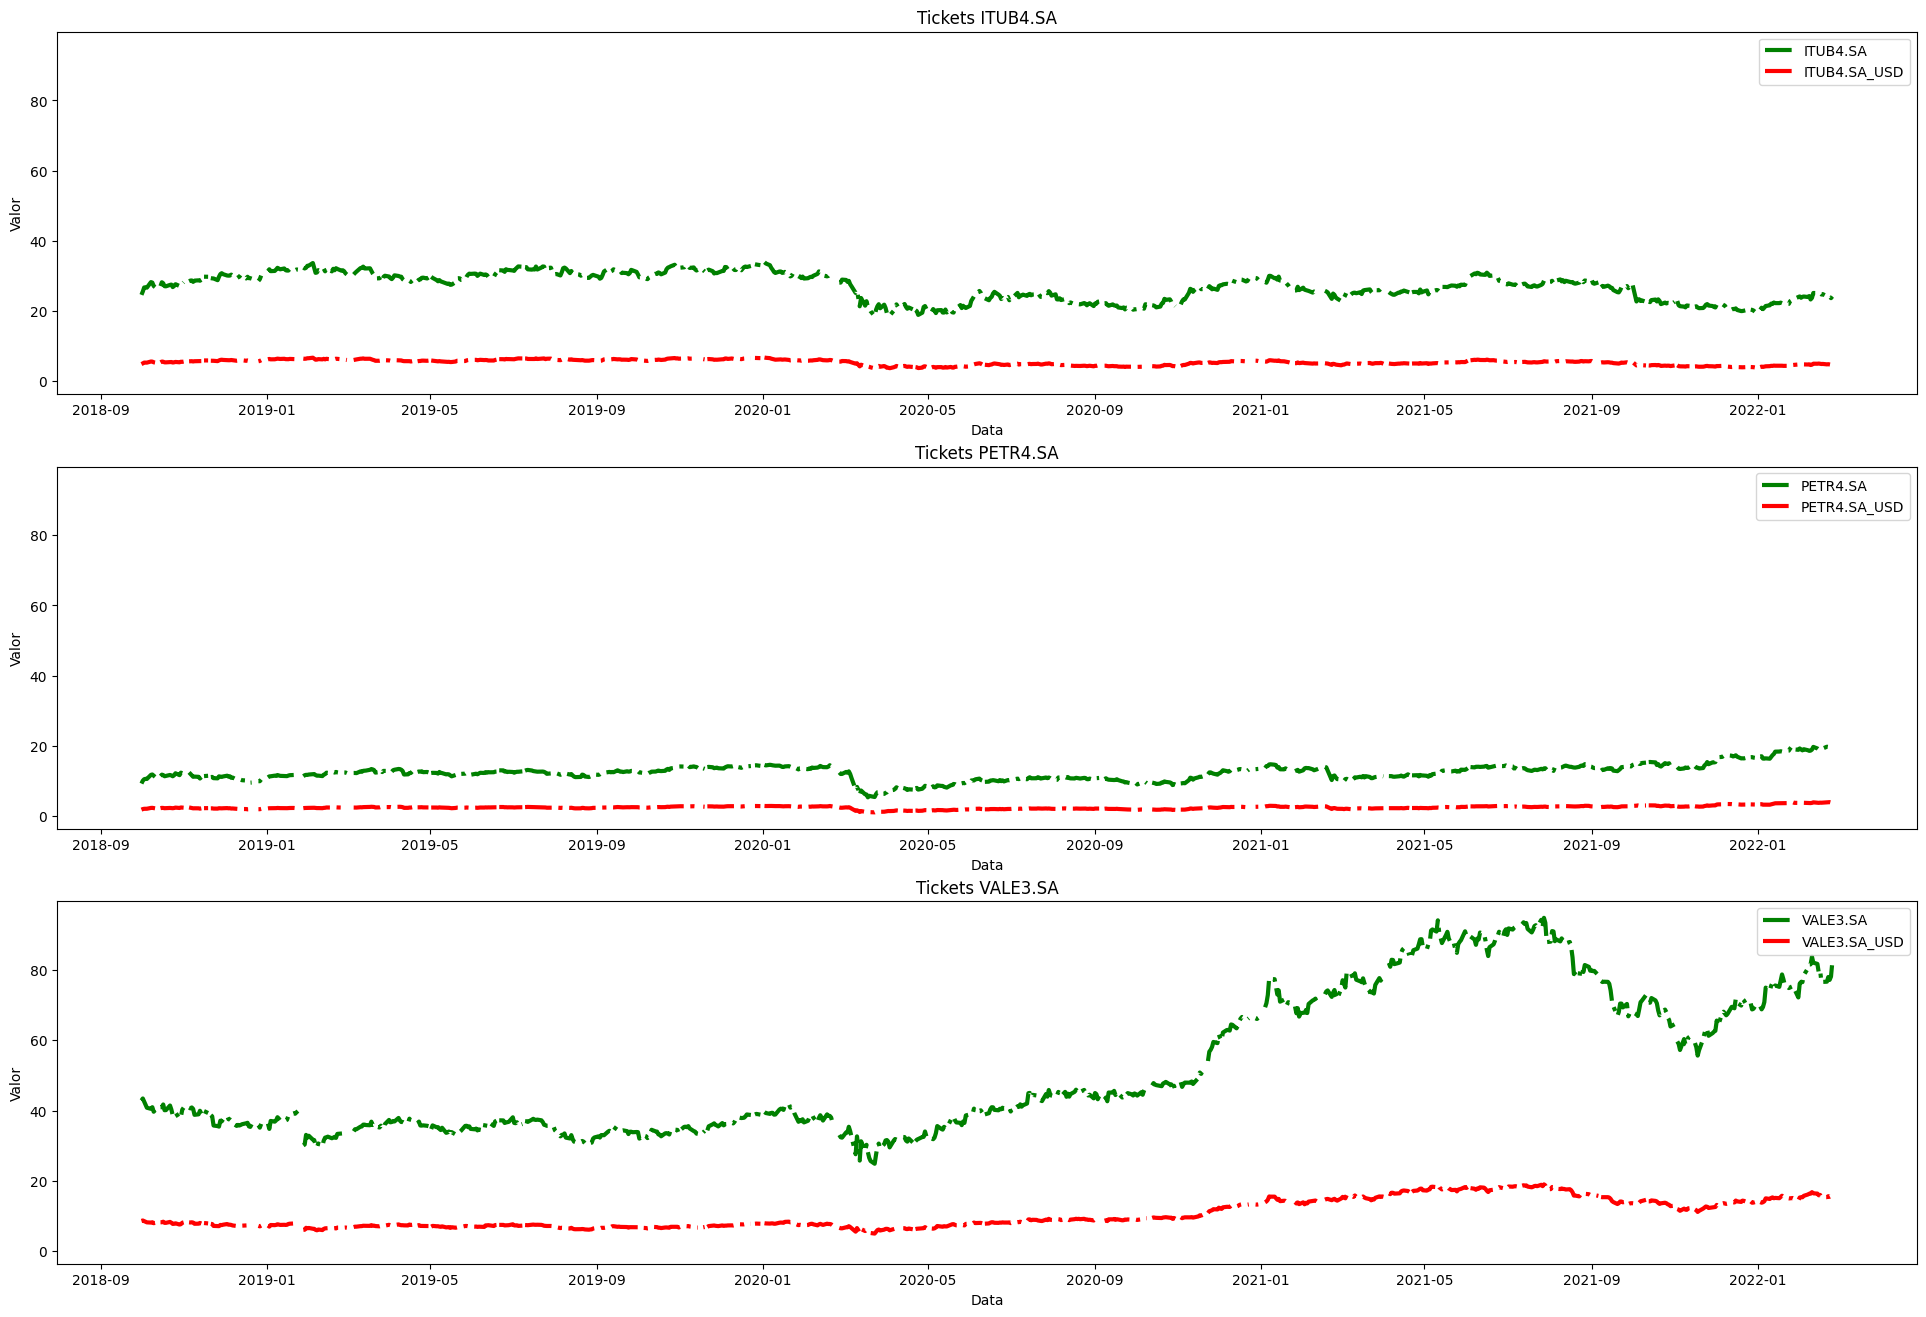

In [24]:
moedas = ['ITUB4.SA', 'PETR4.SA', 'VALE3.SA']
n = 0

fig, ax = plt.subplots(3, 1, figsize=(24, 16), sharey= True)

ax.reshape(-1)

for i in moedas:
  ax[n].plot(df2['Date'], df2[i], color='green', linestyle='dashdot', linewidth=3, markersize=1)
  ax[n].plot(df2['Date'], df2[f'{i}_USD'], color='red', linestyle='dashdot', linewidth=3, markersize=1)


  ax[n].set_title(f'Tickets {i}')
  ax[n].legend([f'{i}', f'{i}_USD'])
  ax[n].set_xlabel('Data')
  ax[n].set_ylabel('Valor')
  n += 1

plt.show()

###Resposta

In [26]:
print("VALE3")

VALE3


##Exercicio 4

In [27]:
df2

,Date,BRL=X,ITUB4.SA,PETR4.SA,VALE3.SA,^BVSP,Date_USD,BRL=X_USD,ITUB4.SA_USD,PETR4.SA_USD,VALE3.SA_USD,^BVSP_USD
0,2018-10-01,4.0527,24.636934,9.295507,42.865036,78624.0,2018-10-01,0.81054,4.927387,1.859101,8.573007,15724.8
1,2018-10-02,4.0164,25.585814,10.101117,43.432785,81612.0,2018-10-02,0.80328,5.117163,2.020223,8.686557,16322.4
2,2018-10-03,3.9395,26.743673,10.530482,42.545677,83273.0,2018-10-03,0.78790,5.348735,2.106096,8.509135,16654.6
3,2018-10-04,3.9004,26.771919,10.632290,41.729538,82953.0,2018-10-04,0.78008,5.354384,2.126458,8.345908,16590.6
4,2018-10-05,3.8739,26.681541,10.605731,40.799854,82322.0,2018-10-05,0.77478,5.336308,2.121146,8.159971,16464.4
...,...,...,...,...,...,...,...,...,...,...,...,...
886,2022-02-22,5.1027,24.447050,19.717787,78.022934,112892.0,2022-02-22,1.02054,4.889410,3.943557,15.604587,22578.4
887,2022-02-23,5.0571,24.105265,19.998297,77.201553,112008.0,2022-02-23,1.01142,4.821053,3.999659,15.440311,22401.6
888,2022-02-24,5.0087,23.697029,19.513243,78.156860,111592.0,2022-02-24,1.00174,4.739406,3.902649,15.631372,22318.4
889,2022-02-25,5.1222,24.181219,19.869728,82.388786,113142.0,2022-02-25,1.02444,4.836244,3.973946,16.477757,22628.4


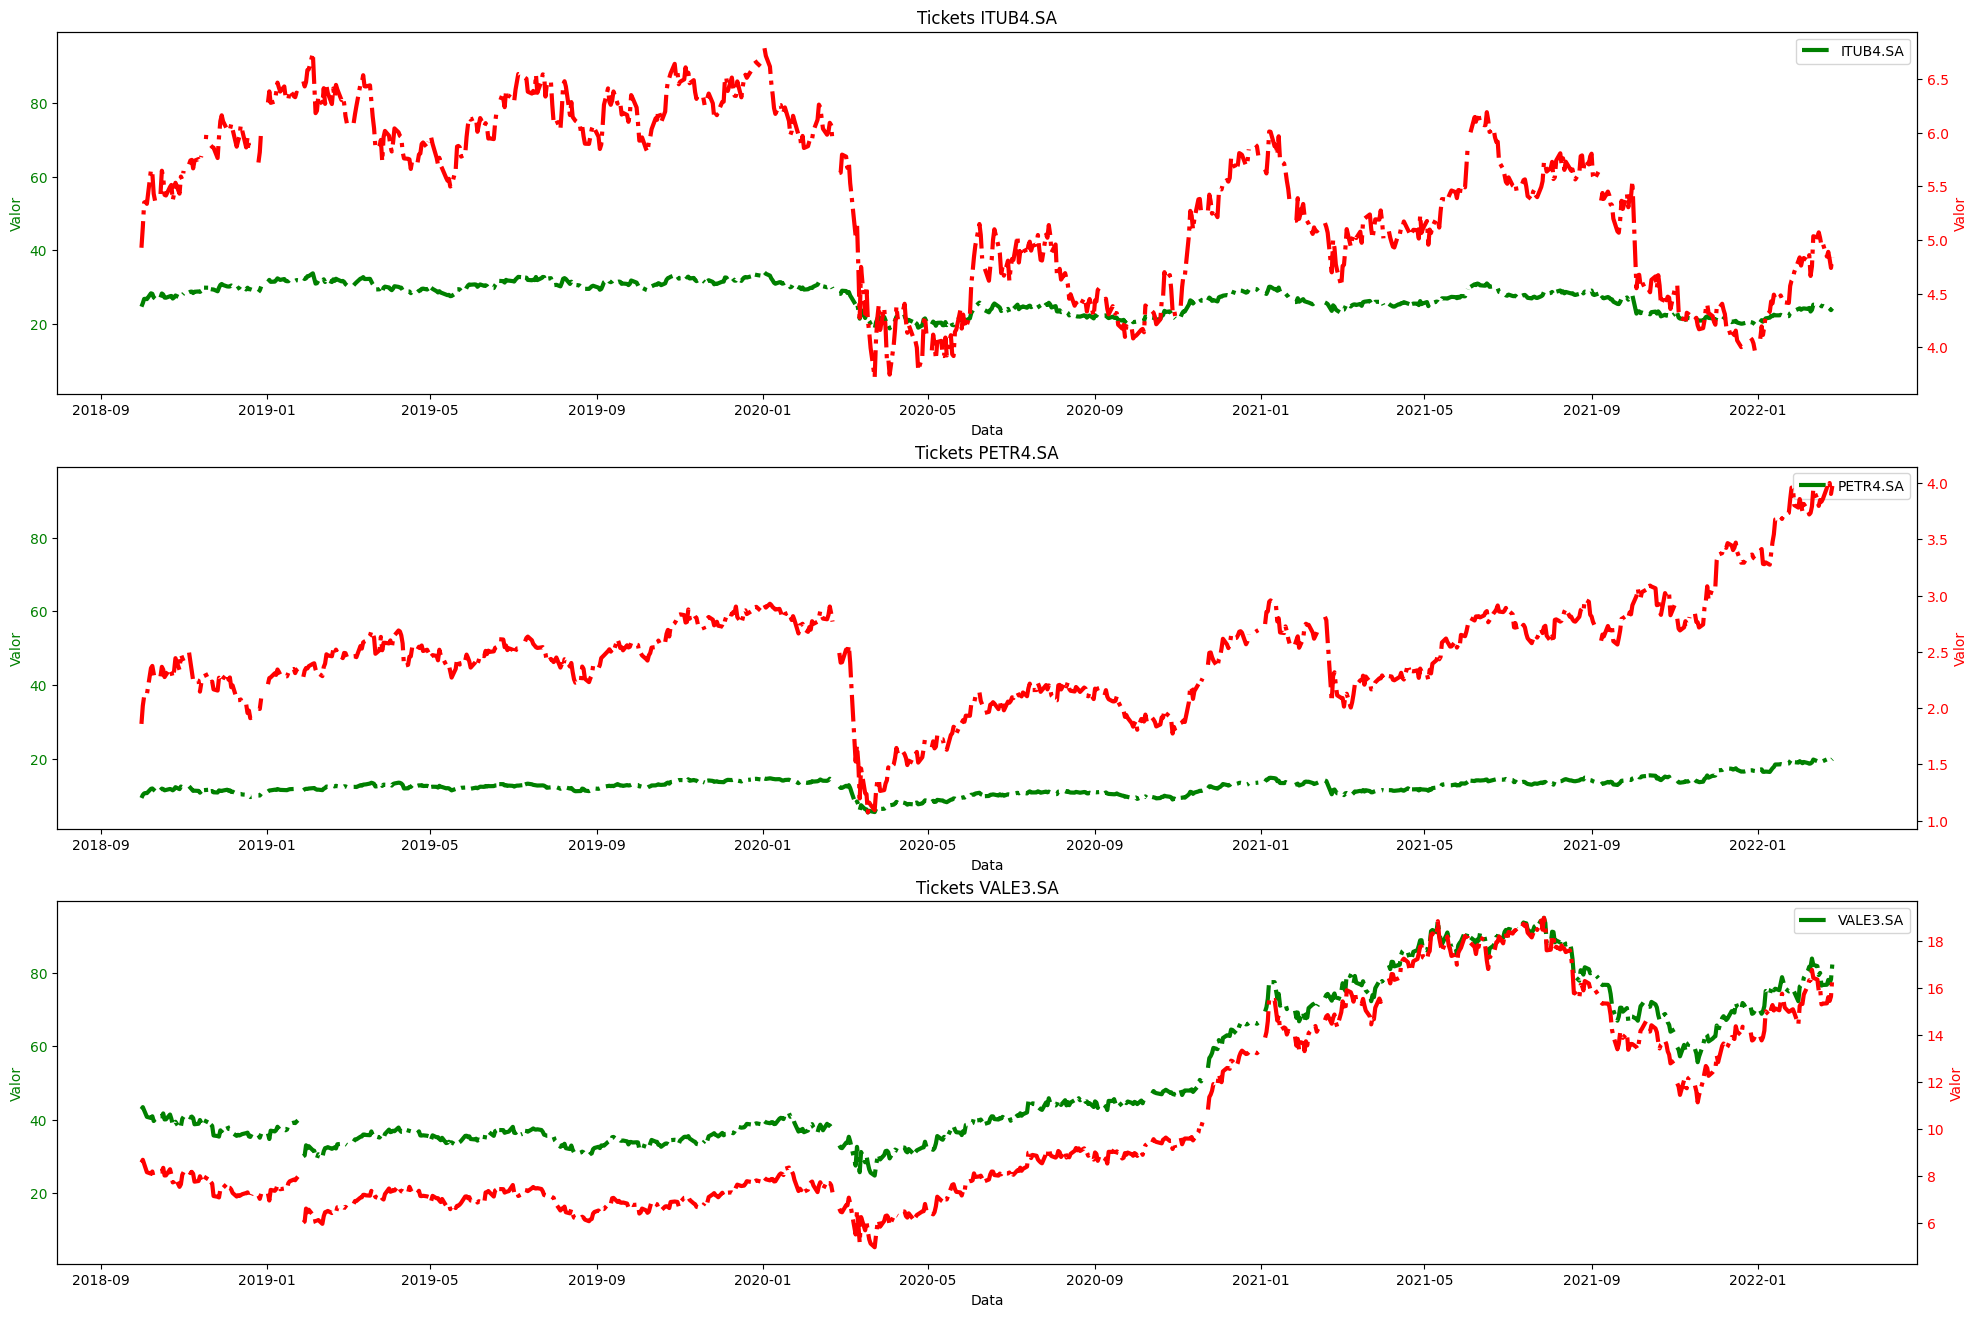

In [62]:
moedas = ['ITUB4.SA', 'PETR4.SA', 'VALE3.SA']

fig, axs = plt.subplots(3, 1, figsize=(24, 16), sharey=True)

for i, moeda in enumerate(moedas):
    x = df2['Date']
    y1 = df2[moeda]
    y2 = df2[f'{moeda}_USD']

    axs[i].plot(x, y1, color='green', linestyle='dashdot', linewidth=3, markersize=1, label='BRL')
    axs[i].set_title(f'Tickets {moeda}')
    axs[i].legend([f'{moeda}', f'{moeda}_USD'])
    axs[i].set_xlabel('Data')
    axs[i].set_ylabel('Valor', color='green')
    axs[i].tick_params(axis='y', labelcolor='green')

    ax2 = axs[i].twinx()
    ax2.plot(x, y2, color='red', linestyle='dashdot', linewidth=3, markersize=1, label='USD')
    ax2.set_ylabel('Valor', color='red')
    ax2.tick_params(axis='y', labelcolor='red')

plt.show()

###Resposta

In [63]:
print("É necessário empregar o modo artist layer e a função twinx()")

É necessário empregar o modo artist layer e a função twinx()


##Exercicio 5

In [64]:
df2

,Date,BRL=X,ITUB4.SA,PETR4.SA,VALE3.SA,^BVSP,Date_USD,BRL=X_USD,ITUB4.SA_USD,PETR4.SA_USD,VALE3.SA_USD,^BVSP_USD
0,2018-10-01,4.0527,24.636934,9.295507,42.865036,78624.0,2018-10-01,0.81054,4.927387,1.859101,8.573007,15724.8
1,2018-10-02,4.0164,25.585814,10.101117,43.432785,81612.0,2018-10-02,0.80328,5.117163,2.020223,8.686557,16322.4
2,2018-10-03,3.9395,26.743673,10.530482,42.545677,83273.0,2018-10-03,0.78790,5.348735,2.106096,8.509135,16654.6
3,2018-10-04,3.9004,26.771919,10.632290,41.729538,82953.0,2018-10-04,0.78008,5.354384,2.126458,8.345908,16590.6
4,2018-10-05,3.8739,26.681541,10.605731,40.799854,82322.0,2018-10-05,0.77478,5.336308,2.121146,8.159971,16464.4
...,...,...,...,...,...,...,...,...,...,...,...,...
886,2022-02-22,5.1027,24.447050,19.717787,78.022934,112892.0,2022-02-22,1.02054,4.889410,3.943557,15.604587,22578.4
887,2022-02-23,5.0571,24.105265,19.998297,77.201553,112008.0,2022-02-23,1.01142,4.821053,3.999659,15.440311,22401.6
888,2022-02-24,5.0087,23.697029,19.513243,78.156860,111592.0,2022-02-24,1.00174,4.739406,3.902649,15.631372,22318.4
889,2022-02-25,5.1222,24.181219,19.869728,82.388786,113142.0,2022-02-25,1.02444,4.836244,3.973946,16.477757,22628.4


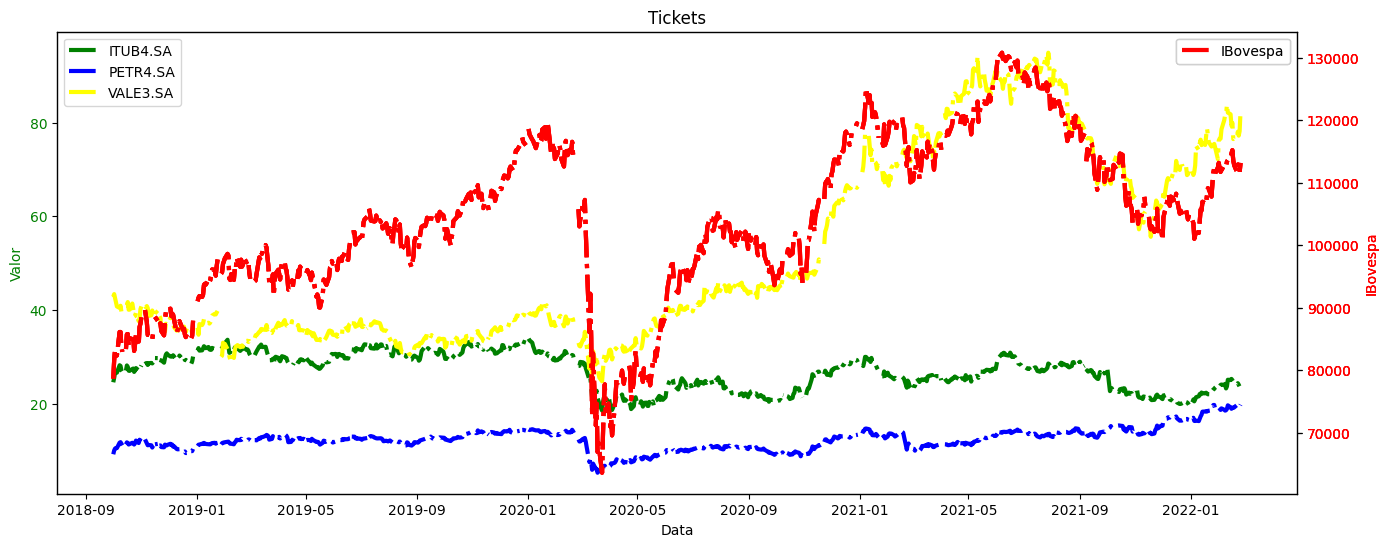

In [85]:
moedas = ['ITUB4.SA', 'PETR4.SA', 'VALE3.SA']
colors = ['green', 'blue', 'yellow']

fig, axs = plt.subplots(1, 1, figsize=(16, 6), sharey=True)

for i, moeda in enumerate(moedas):
    x = df2['Date']
    y1 = df2[moeda]
    y2 = df2['^BVSP']

    axs.plot(x, y1, color=colors[i], linestyle='dashdot', linewidth=3, markersize=1, label=moeda)
    axs.set_title(f'Tickets')
    axs.legend()
    axs.set_xlabel('Data')
    axs.set_ylabel('Valor', color='green')
    axs.tick_params(axis='y', labelcolor='green')

    ax2 = axs.twinx()
    ax2.plot(x, y2, color='red', linestyle='dashdot', linewidth=3, markersize=1)
    ax2.set_ylabel('IBovespa', color='red')
    ax2.legend(['IBovespa'])
    ax2.tick_params(axis='y', labelcolor='red')

plt.show()

###Resposta

In [86]:
print("VALE3, com recuperação em menos de 12 meses")

VALE3, com recuperação em menos de 12 meses
